<div style="border:solid Purple 2px; padding: 40px">

<b>Привет, Игорь!👋

Меня зовут Эльвира Нургалиева, я буду ревьюером твоего проекта. Предлагаю общаться на «ты», но если это не удобно - дай мне знать, и мы перейдем на «вы».


Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:


<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>
    
Такими комментариями я буду помечать отлично проделаную работу😉
</div>
    
<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>
        
В таких комментариях я постараюсь подсказать тебе более элегантное или легкое решение, некоторые хитрости и фишки. Части проекта, помеченные такими комментариями, можно не исправлять, но рекомендую обратить на них внимание.</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 🤔<a class="tocSkip"></h2>
    
В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Если ты видишь такой комментарий, значит здесть есть недочет, который следует исправить.
</div>

Ты также можешь реагировать на мои комментарии своими, выделяя их цветами и наиболее понравившимся тебе способом оформления, но явно  отличающимся от моих комментариев. Это нужно, чтобы не создавалась путаница🙃
    
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Чтобы сделать подобный блок, кликни здесь дважды и скопируй всю предыдущую строку ;)
    
Пожалуйста, не удаляй и не перемещай мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта.</div></b>

#  Анализ результатов A/B-теста интернет-магазина.

Нужна приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.  
  - Первый этап - изучение общий информации.
  - Второй этап - предобработка данных.
  - Третий этап - приоритизация гипотез.
  - Четвертый этап - запустить A/B-тест и проверит гипотезы, анализ результатов.
  - Пятый этап - общий вывод. 
 
Среди данных у нас есть гипотез по увеличению выручки интернет-магазина с указанными параметрами, идентификаторы заказа, идентификаторы пользователя, выручка заказа, количество пользователей. Данные разбиты на две группы A и B.



<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>
    
Очень здорово, что ты начинаешь проект с такого подробного введения, так держать!
</div>

##   Изучение общий информации. 

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

In [2]:
efforts = pd.read_csv('/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 130
display(efforts)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>
        
Расширить вывод содержимого ячеек мы можем с помощью следующей настройки, так мы сможем увидеть полный текст гипотез:
    
```python
pd.options.display.max_colwidth = 130
```
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊 v_2 <a class="tocSkip"> </h2>

👍

In [3]:
orders = pd.read_csv('/datasets/orders.csv')
display(orders.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [4]:
visitors = pd.read_csv('/datasets/visitors.csv')
display(visitors.head())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Для удобства нужно привести название столбцов в таблице efforts к нижнему регистру, проверить типы данных, следует изучить наличие пропусков и дубликатов.

<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>
    
Сразу после получения информации о таблице, будет здорово сформулировать вывод: проверить типы данных, а также важно понять, что по пропущенным значениям.
</div>

## Предобработка данных.

In [5]:
print(efforts.isna().sum())
print('Количество дубликатов:', efforts.duplicated().sum())

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64
Количество дубликатов: 0


In [6]:
print(orders.isna().sum())
print('Количество дубликатов:', orders.duplicated().sum());

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
Количество дубликатов: 0


In [7]:
print(visitors.isna().sum())
print('Количество дубликатов:', visitors.duplicated().sum());

date        0
group       0
visitors    0
dtype: int64
Количество дубликатов: 0


<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>

Импорт библиотек лучше производить в первой ячейке. Так сложней случайно удалить ячейку с загрузкой нужной библиотеки и сделать код не работающим. А получатель отчета сразу поймет, какие библиотеки ты используешь и какие ему нужно установить для запуска проекта.

</div>

In [8]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)


visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
#print(visitors)

efforts.columns = efforts.columns.str.lower()

У столбцов с датами изменены типы на более подходящие, пропусков и дубликатов нет.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 🤔<a class="tocSkip"></h2>
    <s>
Мы пропустили важные шаги предобработки - проверка на дубликаты и пропуски, давай добавим)

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊 v_2 <a class="tocSkip"> </h2>

Отлично)

<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>
        
Можно провести дополнительные исследования, например: 
    
* Посмотреть сколько у нас групп в АВ-тесте;
* Изучить временной интервал, узнав даты начала и окончания теста;
* Рассмотреть количество пользователей в каждой группе - по таблице с заказами;
* Посмотреть не попадают ли какие-то пользователи в обе группы - по таблице с заказами.
* Посмотреть динамику посетителей по дням по группам (visitos).
</div>

## Приоритизация гипотез.

In [9]:
efforts['ICE'] = efforts['impact'] * efforts['confidence'] / efforts['efforts']
print(efforts[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).head(5).round(2))

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   

     ICE  
8  16.20  
0  13.33  
7  11.20  
6   8.00  
2   7.00  


<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>
        
Будет лучше округлить значения до 2 знаков после запятой. </div>   

In [10]:
efforts['RICE'] = efforts['reach'] * efforts['impact'] * efforts['confidence'] / efforts['efforts'] 
print(efforts[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).head(5))

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   

    RICE  
7  112.0  
2   56.0  
0   40.0  
6   40.0  
8   16.2  


<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓 v_2<a class="tocSkip"> </h2>

 Для отображения таблиц лучше использовать display(), вместо print().

В топ пять входят гипотезы:

- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.  
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. 
- Запустить акцию, дающую скидку на товар в день рождения.

Но их порядок разница так как в RICE еще учитывается охват пользователей(Reach). У гипотезы "Добавить форму подписки на все основные страницы" Reach больше чем у "Добавить два новых канала привлечения трафика" и "Запустить акцию, дающую скидку на товар в день рождения" поэтому в RICE она занимает первое место, а в ICE "Запустить акцию, дающую скидку на товар в день рождения" занимает первую позицию.  

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>
    
Приоретизация гипотез проведена успешно! Молодец, что выводишь таблицу дважды, каждый раз с сортировкой по одному из фреймоврков, так различия в их работе будут максимально наглядными. Будет здорово добавить в начало небольшое описание фремворков, в выводе вместе с номером, стоит указать полное название гипотез. 
</div>   

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 🤔<a class="tocSkip"></h2>
<s>
Обрати внимание, что, на самом деле - мы выводим не номер, а индекс гипотезы в конкретном файле. Если такой вывод передать коллегам, то у них под этими номерами могут быть иные гипотезы. Поэтому следует указать полное название гипотез.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊 v_2 <a class="tocSkip"> </h2>

Так лучше)

## Проверка гипотез и анализ результатов.

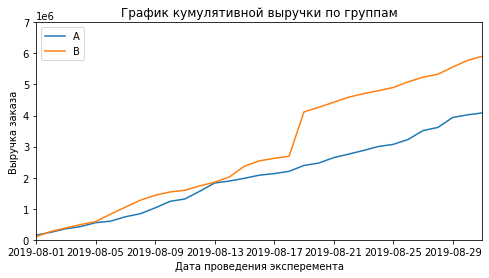

In [11]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeRevenueB = cumulativeData[cumulativeData['group']== 'B'][['date','revenue', 'orders']]
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.axis([pd.to_datetime("2019-08-01"), pd.to_datetime('2019-08-31'), 0, 7000000])
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата проведения эксперемента')
plt.ylabel('Выручка заказа')
plt.gcf().set_size_inches(8, 4)
plt.show();
#№1

Выручка обеих групп растет, группа B ближе к середине графика начинает опережать группу А и чуть позже делает резкий скачек, скорее всего это обусловлено большими заказами с аномальна высокой выручкой, либо высокое число заказов в выборке. 

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 🤔<a class="tocSkip"></h2>
   <s>
Поскольку проект второго модуля, необходимо скорректировать отображение по оси х на всех графиках: можно увеличить график или немного повернуть подписи. 
    
Давай также уточним какими аномалиями может быть обусловлен такой резкий скачок, что могло повлиять на значение выручки)

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊 v_2 <a class="tocSkip"> </h2>

Верно)

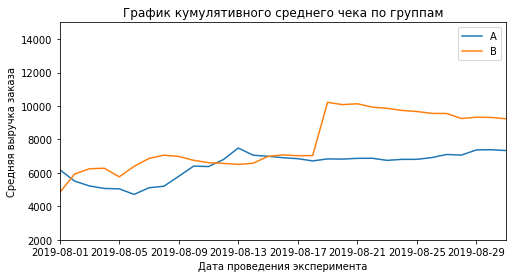

In [12]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.axis([pd.to_datetime("2019-08-01"), pd.to_datetime('2019-08-31'), 2000, 15000])
plt.legend()
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата проведения эксперимента')
plt.ylabel('Средняя выручка заказа')
plt.gcf().set_size_inches(8, 4)
plt.show();
#№2

Средний чек не равномерен и группа A и группа B имеют очень резкие колебания, требуется дополнительный анализ выбросов которые искажают результаты.

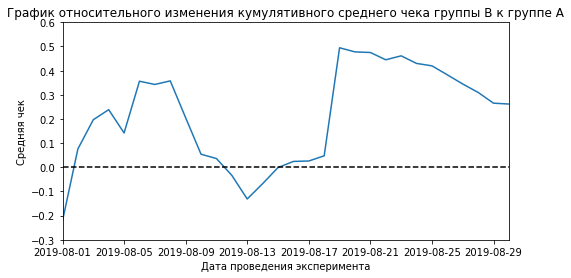

In [13]:
merge_c_r = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


plt.plot(merge_c_r['date'],
         (merge_c_r['revenueB']/merge_c_r['ordersB'])/(merge_c_r['revenueA']/merge_c_r['ordersA'])-1
        )
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата проведения эксперимента')
plt.ylabel('Средняя чек')
plt.axis([pd.to_datetime("2019-08-01"), pd.to_datetime('2019-08-30'), -0.3, 0.6])
plt.gcf().set_size_inches(8, 4)
plt.show();
#№3

По графику относительного изменения кумулятивного среднего чека видны различия, несколько дней сильно менялись данные их нужна проверять на аномалии, выбросы и крупные заказы.

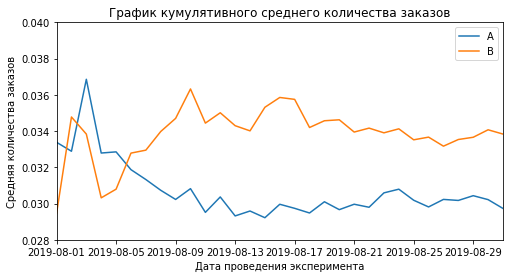

In [14]:
cumulativeOrdersB = cumulativeData[cumulativeData['group']== 'B'][['date', 'orders','visitors', 'buyers']]
cumulativeOrdersA = cumulativeData[cumulativeData['group']=='A'][['date', 'orders', 'visitors', 'buyers']]

plt.plot(cumulativeOrdersA['date'], cumulativeOrdersA['orders']/cumulativeOrdersA['visitors'], label='A')
plt.plot(cumulativeOrdersB['date'], cumulativeOrdersB['orders']/cumulativeOrdersB['visitors'], label='B')
plt.legend()
plt.title('График кумулятивного среднего количества заказов')
plt.xlabel('Дата проведения эксперимента')
plt.ylabel('Средняя количества заказов')
plt.axis([pd.to_datetime("2019-08-01"), pd.to_datetime('2019-08-31'), 0.028, 0.04])
plt.gcf().set_size_inches(8, 4)
plt.show();

Количество заказов в обеих группах к середине начинает быть стабильной. Группа В по мере накопления данных становится выше группы А и держится на этом уровне до конца теста.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 🤔  <a class="tocSkip"></h2>
<s>
Для того чтобы найти среднее количество заказов, нам необходимо поделить количество заказов на посетителей (visitors). Давай скорректируем показатели здесь и соответсвенно расчет разницы ниже и обновим выводы.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊 v_2 <a class="tocSkip"> </h2>

Теперь все верно)

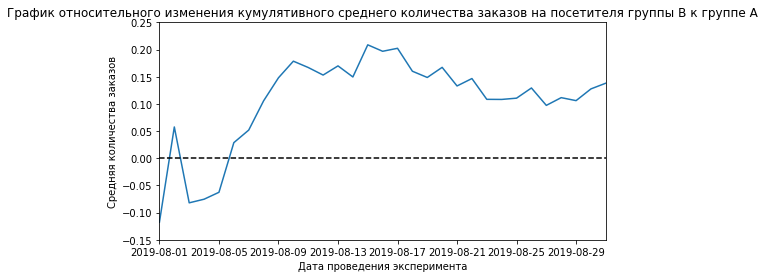

In [15]:
merge_c_o = cumulativeOrdersA.merge(cumulativeOrdersB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(merge_c_o['date'],
         (merge_c_o['ordersB']/merge_c_o['visitorsB'])/(merge_c_o['ordersA']/merge_c_o['visitorsA'])-1
        )

plt.axhline(y=0, color='black', linestyle='--')
plt.axis([pd.to_datetime("2019-08-01"), pd.to_datetime('2019-08-31'), -0.15, 0.25])
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата проведения эксперимента')
plt.ylabel('Средняя количества заказов')
plt.gcf().set_size_inches(8, 4)
plt.show();

График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A, на середине графика есть небольшой подъем возможна из за аномального количества заказов или выбросов.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 🤔 v_2 <a class="tocSkip"> </h2>
<s>
Допущена ошибка в расчетах.  Мы делим посетителей на кол-во заказов в расчете группы В)
    
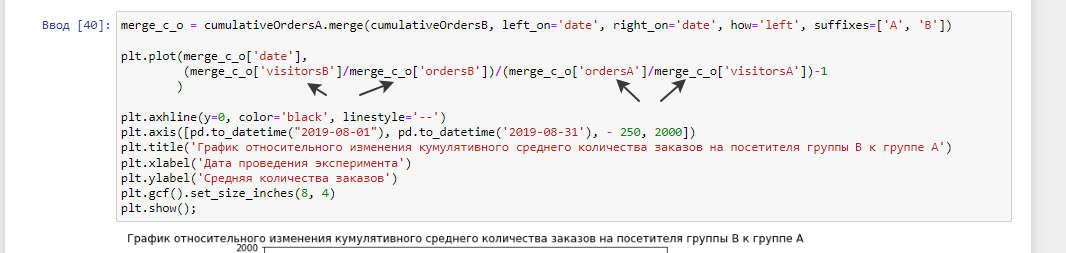

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>
    
Графики нуждаются в доработке)

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


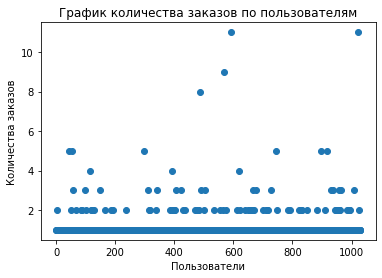

In [16]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['user_id', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers['orders'])))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количества заказов')
plt.show();
#№6

Есть много пользователей с 2-5 заказами.

In [17]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))
#№7

[1. 2. 4.]


Не больше 5% пользователей совершили больше двух заказов и не больше 1% пользователей совершили больше четырех заказов. За аномалию возьмем 3 заказами. 

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


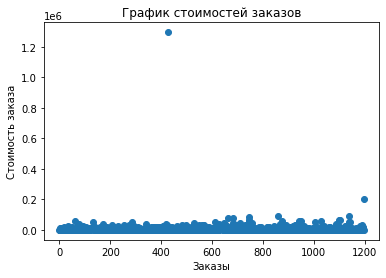

In [18]:
display(orders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказа')
plt.show();
#№8 

Есть выбросы в районе 200 000 рублей и в 1 200 000 рублей. 

<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>
Можно добавить еще один график, ограничив значения по оси Y. Чтобы двух явных выбросов не было видно, а мы могли рассмотреть основную часть заказов.

In [19]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 
#№9

[18168.  28000.  58233.2]


Не более, чем у 5% заказов чек дороже 28000. И не больше, чем у 1% заказов - дороже 58233 рублей. За аномалии возьмем 50000.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Расчеты аномальных значений проведены верно, молодец)

<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>
Расчеты верные, а вот по выводам так и не ясно, что же мы будем принимать за аномалии. Можешь детализировать этот момент и указать принятые границы аномалий.
</div>

In [20]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [21]:
cumulativeRevenueA.columns = ['date',  'revenueCummulativeA','ordersCummulativeA'] 
cumulativeRevenueB.columns = ['date',  'revenueCummulativeB','ordersCummulativeB'] 

In [22]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [23]:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
#print(visitorsBCummulative)

In [24]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(cumulativeRevenueA, left_on='date', right_on='date', how='left')
    .merge(cumulativeRevenueB, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [25]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId' : pd.Series.nunique})
)

ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId' : pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders'] 
    
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum()-len(ordersByUsersA['orders'])), name='ordres')

[ordersByUsersA['orders'],
 pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
           name='orders')];

In [26]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


Проверим статистическую значимость различий в среднем количестве заказов на посетителя по «сырым» данным.

Сформулируем гипотезы:
- Нулевая: различий в среднем количестве заказов между группами нет. 
- Альтернативная: различия в среднем между группами есть.

In [27]:
#статистическая значимость различий в среднем количестве заказов на посетителя
print('Значения p-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Различие в средних:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
#№10

Значения p-value: 0.017
Различие в средних: 0.138


<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>

Чтобы не возникало путаницы, следует подписать значения, какое из них - p-value, а какое - различие в средних. 

Вывод: По «сырым» данным различий в среднем числе заказов групп A и B есть. Разница между сегментами 13%.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>
Гипотезы сформулированы верно и значение p-value интерпретировано правильно. Хорошая работа.
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 🤔<a class="tocSkip"></h2>
<s>
Давай также укажем в выводах расшифровку второго значения, которое мы рассчитали.

Теперь проверим статистическую значимость различий в среднем чеке между группами по «сырым» данным.

Сформулируем гипотезы:
- Нулевая гипотеза: различий в среднем чеке между группами нет. 
- Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [28]:
print('Значения p-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Различие в средних:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
#№11

Значения p-value: 0.729
Различие в средних: 0.259


Вывод: Причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Разница между сегментами 26%. 

In [29]:
usersWithManyOrders = pd.concat(
[
    ordersByUsersA[ordersByUsersA['orders'] > 3]['user_id'],
    ordersByUsersB[ordersByUsersB['orders'] > 3]['user_id'],
],
axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 50000]['visitorId']
abnormalUsers =(
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
    )
print(abnormalUsers.head(5))
#№12

1099    148427295
18      199603092
23      237748145
1137    759473111
949     887908475
dtype: int64


<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>

Чтобы в дальнейшем мы могли использовать анализ повторно, будет лучше отказаться от  ручного ввода обозначаемых границ, и заменить на соответствующие коду обозначения (перцентили))

 Использовать 95% перцентиль для отсечения выбросов - возможный вариант. Но в данном случае лучше использовать 99% перцентиль. Мы фильтруем по двум параметрам. А значит при последовательном отсечении 5%, мы отбросим больше 5%, а это не очень хорошо.

In [30]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
#№12

Проверим статистическую значимость различий в среднем количестве заказов на посетителя по «очищенным»  данным.

Сформулируем гипотезы:
- Нулевая: различий в среднем количестве заказов между группами нет. 
- Альтернативная: различия в среднем между группами есть.


In [31]:
print('Значения p-value:', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Различие в средних:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 
#№12

Значения p-value: 0.011
Различие в средних: 0.158


Вывод: По «очищенным» данным различий в среднем числе заказов групп A и B есть. Результаты по среднему количеству заказов практически не изменились.

Теперь проверим статистическую значимость различий в среднем чеке между группами по «очищенным» данным.

Сформулируем гипотезы:

- Нулевая: различий в  среднем чеке между группами нет.
- Альтернативная: различия в среднем между группами есть.

In [32]:
print('Значения p-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Различие в средних:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 
#№13

Значения p-value: 0.819
Различие в средних: 0.024


Вывод: Причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.  P-value увеличелось, разница между сегментами сократилась с 25% до 2%.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>
    
Статистический анализ выполнен правильно, замечательная работа!)

## Общие вывод.


Результаты исследования: 

- При проведении теста лучше выбирать "Запустить акцию, дающую скидку на товар в день рождения"(при учете ICE) или "Добавить форму подписки на все основные страницы"(при учете RICE)
- Есть статистически значимые различия по среднему количеству заказов между группами по «сырым» и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия среднего чека колеблется. Сделать из этого графика определённые выводы нельзя;
- График различия среднего количества заказов на посетителя показывает, что результаты группы B лучше группы A;

По количеству заказов есть результат тут тест успешен, но по среднему чеку результатов нет. 
Вероятность, что продолжив наблюдения теста по среднему чеку между группами B может оказаться на самом деле лучше сегмента A мало вероятна, здесь тест можно признать неуспешным.
Тест можно остановить группа B показала результат по увеличению количества заказов лучше чем группа А, тест можно признать успешным.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 🤔<a class="tocSkip"></h2>
<s>
Давай уточним какое решение по тесту мы принимаем) 
    
Так же можно дополнить вывод результатами приоретизации гипотез.

<div style="border:solid Purple 2px; padding: 40px">

<h2> Общий комментарий ревьюера 😊 v_3<a class="tocSkip"> </h2>
    <br/>
Игорь, спасибо за проект! Успехов в дальнейшем обучении!)
  

<div style="border:solid Purple 2px; padding: 40px">

<h2> Общий комментарий ревьюера 😊 v_2<a class="tocSkip"> </h2>
    <br/>
    
Игорь, осталось доработать один расчет с графиком)

<div style="border:solid Purple 2px; padding: 40px">

<h2> Общий комментарий ревьюера 😊<a class="tocSkip"> </h2>
    <br/>
 Игорь, ты хорошо поработал, отлично справляешься с графиками и статистическим анализом) есть пара небольших красных блоков, но, в целом - все отлично!
    
Необходимо доработать:
    
* Добавить проверку на пропуски и дубликаты
* Скорректировать отображение по оси Х
* Уточнить решение по тесту
* Остальные комментарии ты найдешь в работе
    
 
**Желаю удачи и жду твой проект на повторное ревью! Если вдруг у тебя возникнут вопросы, то я с радостью отвечу на них.    😊**
    
![gif](https://i.gifer.com/378.gif)
    
<br>   
             
**Дополнительные материалы:**
 
[Вебинары под эгидой Практикума](https://vk.com/yandex.praktikum?w=wall-176471180_2144), 
    
[Лекции Анатолия Карпова 1](https://www.youtube.com/watch?v=jnFVmtaeSA0&list=WL&index=19&t=2s) [2](https://www.youtube.com/watch?v=gljfGAkgX_o&list=WL&index=4)
    
Материалы [gopractice](https://gopractice.ru/summary/)

Лекцию Карта статистических методов [Смотреть видео](https://www.youtube.com/watch?v=-zps6hm0nX8&t=1269s)
        
</div>
    